In [152]:
import cv2
import numpy as np
import pandas as pd

In [153]:
videoList = ["VID_20150123_172926_F.mp4.txt",
    "VID_20150123_173259_Q.mp4.txt",
    "VID_20150123_173329_F.mp4.txt",
    "VID_20150123_173358_Q.mp4.txt",
    "VID_20150123_173427_F.mp4.txt",
    "VID_20150123_173457_Q.mp4.txt",
    "VID_20150123_173556_Q.mp4.txt",
    "VID_20150123_173629_F.mp4.txt",
    "VID_20150123_173700_Q.mp4.txt",
    "VID_20150123_173757_Q.mp4.txt",
    "VID_20150123_173028_F.mp4.txt",
    "VID_20150123_172857_Q.mp4.txt"]
fps = 30.323427803

In [154]:
def readFromFile(fileName):
    l =np.loadtxt(fileName)
    return l[0], l[1], l[2]

In [155]:
#will return a list of the indexes of the peaks
def peakList(colorList, frameThreshold):
    peaks = []
    for i in range(1,len(colorList)-1):
        #check to see if greater than immediate surroundings
        if colorList[i-1] <  colorList[i]  and colorList[i+1] <  colorList[i]:
            #if so, check every other frame in the threshold
            for j in range(2, frameThreshold):
                #check everything in threshold before - will break if not a peak
                if i-j>0:
                    if colorList[i]<colorList[i-j]:
                        break
                #check everything in threshold after
                if i+j<len(colorList):
                    if colorList[i]<colorList[i+j]:
                        break
            else:
                peaks.append(i)
    return peaks

In [156]:
def rrList(peakIndexes):
    rrlist = [];
    for i in range(1,len(peakIndexes)):
        rr = (peakIndexes[i]-peakIndexes[i-1])*1/fps
        rrlist.append(rr)
    return rrlist

In [157]:
def timeList(rrList):
    times = [rrList[0]]
    for i in range(1,len(rrList)):
        times.append(times[i-1]+rrList[i])
    return times

In [158]:
thresholds = range(1,31)

In [159]:
def getError(rrList):
    errors = 0
    for rr in rrList:
        #heart beat ranges from 50 to 110 pulses per minute
            if rr<.54 or rr>1.0:
                errors = errors+1
    return errors

In [160]:
#goes through all vids, constructs matrix with vid,colors,errors
allErrors = []
for eachVideo in range(0,len(videoList)):
    allErrors.append([[],[],[]])
    
        
for nameIndex in range(0,len(videoList)):
    #for every vid, get colors
    r,g,b = readFromFile(videoList[nameIndex])
    colors = [r,g,b]
    i=0;
    for c in range(0,len(colors)):
        #list of errors for this paricular color and video
        errors = [0]*len(thresholds)
        for i in range(0,len(thresholds)):
        #for every vid, test each threshold for errors
        #add errors to approprate place on redErrors list
            rr = rrList(peakList(colors[c],i+1))
            if len(rr)>0:
                #relative error
                errors[i] = errors[i]+getError(rr)/(len(rr)*1.0)
            if len(rr)==0:
                #no rr intervals detected, which is obviously wrong, so 100% error
                errors[i] = errors[i]+1
        allErrors[nameIndex][c]=errors
#get average number of errors per video
reds= [0]*30
greens= [0]*30
blues = [0]*30
for a in range(0,len(allErrors)):
    for e in range(0,len(allErrors[a][0])):
            reds[e] = reds[e]+allErrors[a][0][e]
            greens[e] = greens[e]+allErrors[a][1][e]
            blues[e]= blues[e]+allErrors[a][2][e]

for i in range(0,len(reds)):
    reds[i] = reds[i]/12.0
    greens[i] = greens[i]/12.0
    blues[i] = blues[i]/12.0


In [161]:
#total threshold window
for i in range(0,len(thresholds)):
    thresholds[i]= thresholds[i]*2

Threshold with minimum number of errors:
16


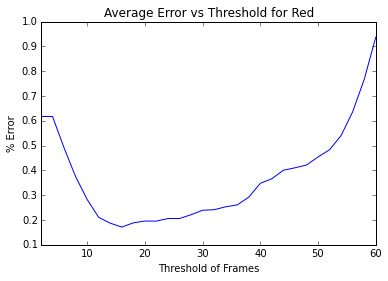

In [176]:

redSeries = pd.Series(reds, index=thresholds)
%matplotlib inline
r = redSeries.plot(title="Average Error vs Threshold for Red")
r.set_xlabel("Threshold of Frames")
r.set_ylabel("% Error")
print "Threshold with minimum number of errors:"
print redSeries.idxmin()

Threshold with minimum number of errors:
18


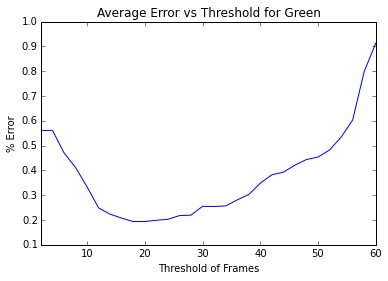

In [177]:
greenSeries = pd.Series(greens, index=thresholds)
%matplotlib inline
g = greenSeries.plot(title="Average Error vs Threshold for Green")
g.set_xlabel("Threshold of Frames")
g.set_ylabel("% Error")
print "Threshold with minimum number of errors:"
print greenSeries.idxmin()

Threshold with minimum number of errors:
32


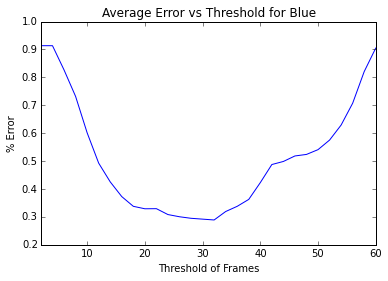

In [178]:
blueSeries = pd.Series(blues, index=thresholds)
%matplotlib inline
b = blueSeries.plot(title="Average Error vs Threshold for Blue")
b.set_xlabel("Threshold of Frames")
b.set_ylabel("% Error")
print "Threshold with minimum number of errors:"
print blueSeries.idxmin()


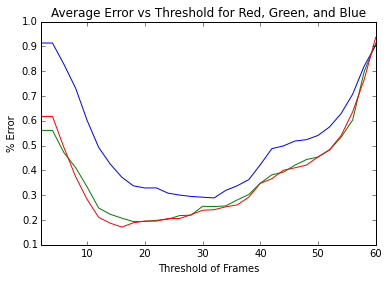

In [180]:
#all on one graph, with colors
b = blueSeries.plot(title="Average Error vs Threshold for Red, Green, and Blue")
g = greenSeries.plot()
r = redSeries.plot()
b.set_xlabel("Threshold of Frames")
b.set_ylabel("% Error")

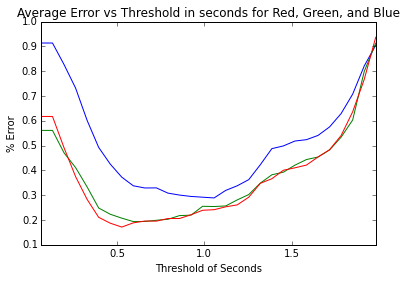

In [181]:
#all on one graph, with colors, x-axis in seconds
thresholdTimes = []

for i in thresholds:
    thresholdTimes.append(i*1/fps)
redSeries = pd.Series(reds, index=thresholdTimes)
greenSeries = pd.Series(greens, index=thresholdTimes)
blueSeries = pd.Series(blues, index=thresholdTimes)
%matplotlib inline
b = blueSeries.plot(title="Average Error vs Threshold in seconds for Red, Green, and Blue")
greenSeries.plot()
redSeries.plot()
b.set_xlabel("Threshold of Seconds")
b.set_ylabel("% Error")